In [8]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector

In [9]:
def cartanCircuit(VCxGate):
    circ = QuantumCircuit(2)
    phi = np.arctan(1 + np.sqrt(3))

    #qubit 0 after VCx
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)

    #qubit 1 after VCx
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.p(9 * np.pi / 16, 1)

    circ.barrier(0)
    circ.barrier(1)

    circ.append(VCxGate.decompose(), [0, 1])


    #qubit 0
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)

    #qubit 1
    circ.p(15 * np.pi / 16, 1)
    circ.x(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)


    return circ

In [10]:
from qiskit.synthesis import TwoQubitWeylDecomposition

In [11]:
pi = np.pi
sqrt = np.sqrt
log = np.log 

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)


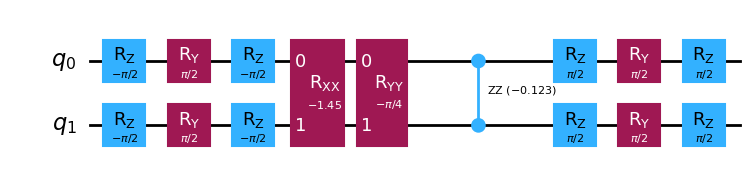

In [12]:
weylDecomCirc = TwoQubitWeylDecomposition(VCx)
VCxGate = weylDecomCirc.circuit()
VCxGate.draw('mpl')

![Original matrix VCx and after Wesley aproximation](./wesleyMatrixFDecomposition.png)

In [13]:
cartanCirc = cartanCircuit(VCxGate)

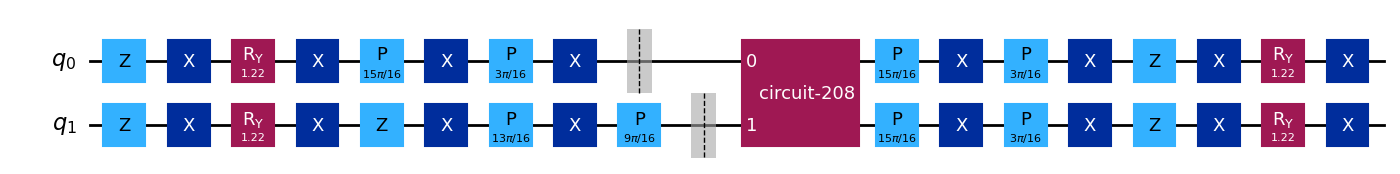

In [14]:
cartanCirc.draw('mpl')

In [15]:
from qiskit.circuit.library import UnitaryGate
transforationMatrix = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])

uniGate = UnitaryGate(transforationMatrix)

In [17]:
Statevector(uniGate).draw('mpl')

NameError: name 'Statevector' is not defined